In [1]:
import math
import os
import openpyxl
import platform
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

if platform.platform()[:3].lower() == 'mac':
    mac_m1 = True
elif platform.platform()[:3].lower() == 'win':
    mac_m1 = False
    
if mac_m1:
    path = '/Users/rainyseason/winston/Workspace/python/Pycharm Project/sinewave_analyze/Evaluation/'
    path_csv = path + 'tek_csv/'
    path_excel = path + 'tek_excel/'
    path_summary = path + 'summary/'
    path_information = path + 'test information/'
    path_kmon = path + 'kmon_csv'
else:
    path = 'D:/data_analyze/'
    path_csv = path + 'tek_csv/'
    path_excel = path + 'tek_excel/'
    path_summary = path + 'summary/'
    path_information = path + 'test information/'
    path_kmon = path + 'kmon_csv/'
    
evaluation_control_file = 'eval_control.xlsx'

In [2]:
files = os.listdir(path_summary)
files = [file for file in files if '00 07' in file and '~' not in file ]
files.sort()
files

['summary 00 07 08Ch3.xlsx', 'summary 00 07 08Ch4.xlsx']

In [3]:
sheet = pd.ExcelFile(path_summary + files[-1]).sheet_names
print(sheet[0])

with kmon correction


In [4]:
df_ch3 = pd.read_excel(path_summary + files[0], sheet[0])
df_ch4 = pd.read_excel(path_summary + files[1], sheet[0])

In [5]:
df_all_dict = {'df_ch3': df_ch3, 'df_ch4': df_ch4}

In [6]:
# # 300ohm, channel간 150ohm으로 측정한 값 분리
df_all_dict['df_ch3_300'] = df_ch3.iloc[15:41, :]
df_all_dict['df_ch4_300'] = df_ch4.iloc[15:41, :]

In [7]:
# # phantom으로 측정한 값 분리

# # channel 3을 sweep 하고 channel 4를 open한 값 분리
df_all_dict['df_ch3_ch3_curr_sweep_ch4_open'] = df_ch3.iloc[54:305, :]
df_all_dict['df_ch4_ch3_curr_sweep_ch4_open'] = df_ch4.iloc[54:305, :]
# # channel 4을 sweep 하고 channel 3를 open한 값 분리
df_all_dict['df_ch3_ch4_curr_sweep_ch3_open'] = df_ch3.iloc[305:556, :]
df_all_dict['df_ch4_ch4_curr_sweep_ch3_open'] = df_ch4.iloc[305:556, :]
# # channel 3을 sweep 하고 channel 4를 220ma 고정한 값 분리
df_all_dict['df_ch3_ch3_curr_sweep_ch4_220ma'] = df_ch3.iloc[556:807, :]
df_all_dict['df_ch4_ch3_curr_sweep_ch4_220ma'] = df_ch4.iloc[556:807, :]
# # channel 4을 sweep 하고 channel 3를 220ma 고정한 값 분리
df_all_dict['df_ch3_ch4_curr_sweep_ch3_220ma'] = df_ch3.iloc[807:, :]
df_all_dict['df_ch4_ch4_curr_sweep_ch3_220ma'] = df_ch4.iloc[807:, :]

del df_ch3
del df_ch4

In [8]:
# # 각 분리한 데이터의 index 초기화
for key, df in df_all_dict.items():
    df.reset_index(inplace=True)
    df.drop('index', axis=1, inplace=True)

C:\Users\winston\AppData\Local\Temp\ipykernel_18272\664097418.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('index', axis=1, inplace=True)
C:\Users\winston\AppData\Local\Temp\ipykernel_18272\664097418.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('index', axis=1, inplace=True)
C:\Users\winston\AppData\Local\Temp\ipykernel_18272\664097418.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('index', ax

In [9]:
# # 데이타 간략화를 위한 삭제 대상 선정
drop_columns = ['Board', 'PWM', 'V Frequency[MHz]', 'Volt', 'Ave. RP Coff', 'Real P[W]', 'Vmean', 'Imean[mA]', 'FFT V freq[MHz]',
       'FFT V rms', 'FFT V dc abs', 'FFT I freq[MHz]', 'FFT I rms[mA]', 'FFT I dc abs[mA]', 'Usr Status',
       'RF Volt Ch 1', 'RF Volt Ch 2', 'RF Curr Ch 1', 'RF Curr Ch 2', 'CP Pwm Ch 1', 'CP Pwm Ch 2', 'Loop Time 0.1 us']

In [10]:
# # 데이타 삭제
for key, df in (df_all_dict.items()):
    for col in drop_columns:
        df.drop([col], axis=1, inplace=True)
    for col in list(df.columns):
        if 'deviation' in col:
            df.drop([col], axis=1, inplace=True)

C:\Users\winston\AppData\Local\Temp\ipykernel_18272\2829820337.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop([col], axis=1, inplace=True)
C:\Users\winston\AppData\Local\Temp\ipykernel_18272\2829820337.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop([col], axis=1, inplace=True)
C:\Users\winston\AppData\Local\Temp\ipykernel_18272\2829820337.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop([col], axis=

In [11]:
df_all_dict.keys()

dict_keys(['df_ch3', 'df_ch4', 'df_ch3_300', 'df_ch4_300', 'df_ch3_ch3_curr_sweep_ch4_open', 'df_ch4_ch3_curr_sweep_ch4_open', 'df_ch3_ch4_curr_sweep_ch3_open', 'df_ch4_ch4_curr_sweep_ch3_open', 'df_ch3_ch3_curr_sweep_ch4_220ma', 'df_ch4_ch3_curr_sweep_ch4_220ma', 'df_ch3_ch4_curr_sweep_ch3_220ma', 'df_ch4_ch4_curr_sweep_ch3_220ma'])

In [12]:
for idx, key in enumerate(df_all_dict.keys()):
    if idx > 3:
        if key == 'df_ch4_ch3_curr_sweep_ch4_220ma':
            for i in range(len(df_all_dict[key])):
                df_all_dict[key].at[i, 'Curr'] = 223
        elif key == 'df_ch3_ch4_curr_sweep_ch3_220ma':
            for i in range(len(df_all_dict[key])):
                df_all_dict[key].at[i, 'Curr'] = 222
        elif key != 'df_ch4_ch3_curr_sweep_ch4_open' and key != 'df_ch3_ch4_curr_sweep_ch3_open':
            for i in range(len(df_all_dict[key])):
                df_all_dict[key].at[i, 'Curr'] = i

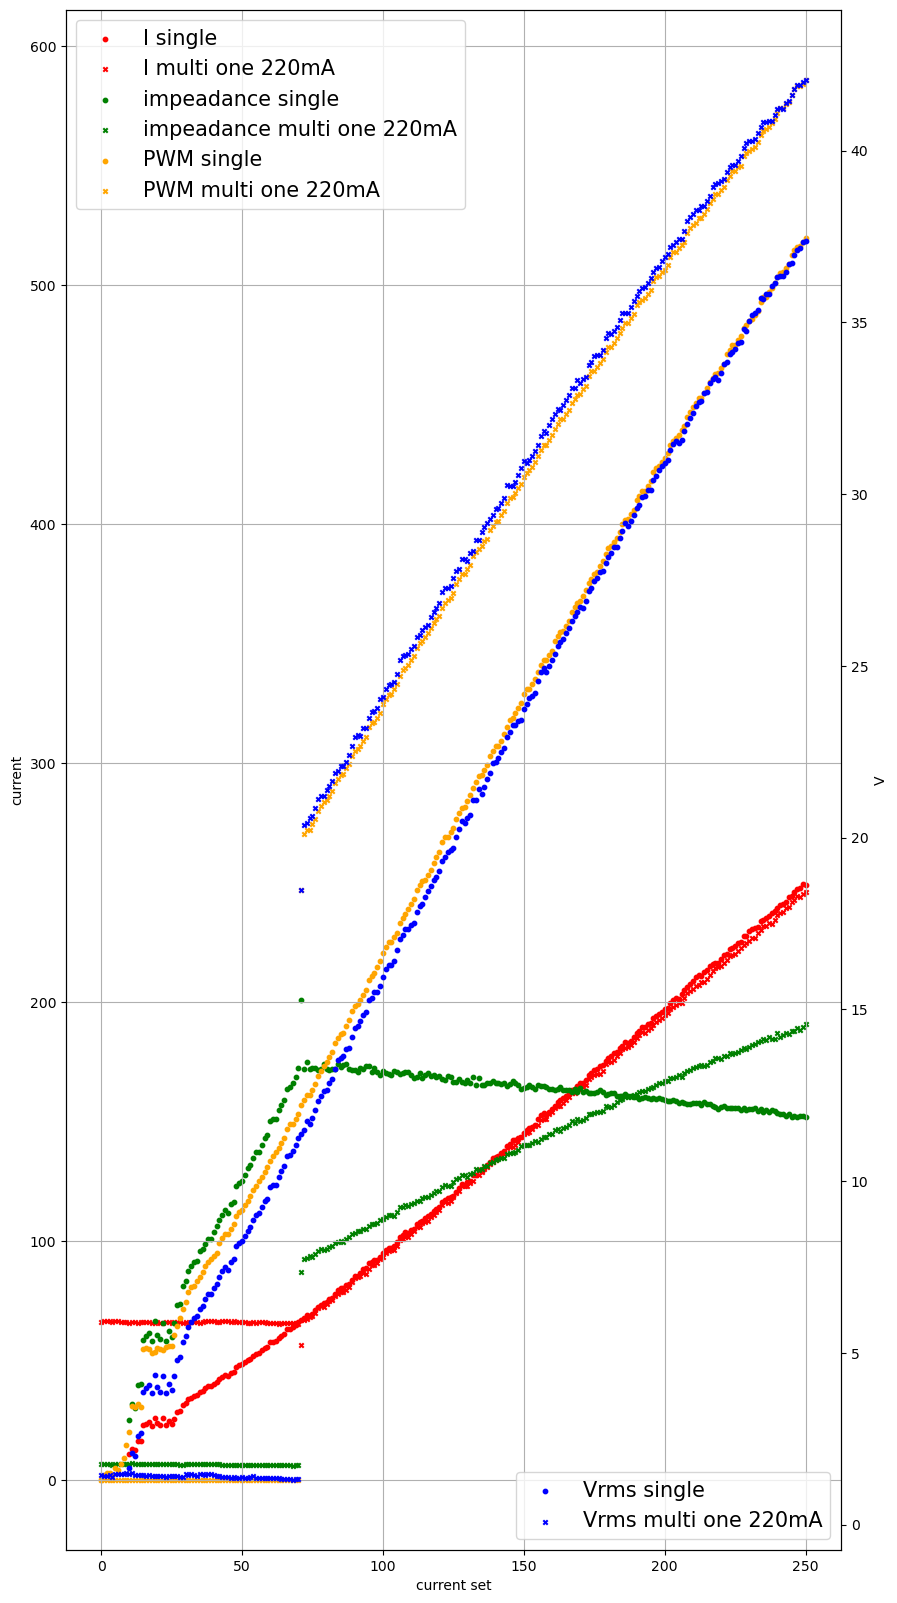

In [13]:
# # channle 3 변경과 channel 4 단락 또는 220mA 고정 값 비교
x =   df_all_dict['df_ch3_ch3_curr_sweep_ch4_open']['Curr']
y =   df_all_dict['df_ch3_ch3_curr_sweep_ch4_open']['Irms[mA]']
y2 =  df_all_dict['df_ch3_ch3_curr_sweep_ch4_220ma']['Irms[mA]']
y3 = (df_all_dict['df_ch3_ch3_curr_sweep_ch4_open']['Vpeak[V]'] / math.sqrt(2)) / df_all_dict['df_ch3_ch3_curr_sweep_ch4_220ma']['Irms[mA]'] * 1000
y4 = (df_all_dict['df_ch3_ch3_curr_sweep_ch4_220ma']['Vpeak[V]'] / math.sqrt(2)) / df_all_dict['df_ch4_ch3_curr_sweep_ch4_220ma']['Irms[mA]'] * 1000
y5 =  df_all_dict['df_ch3_ch3_curr_sweep_ch4_open']['CP Pwm Ch 3']
y6 =  df_all_dict['df_ch3_ch3_curr_sweep_ch4_220ma']['CP Pwm Ch 3']
y7 = (df_all_dict['df_ch3_ch3_curr_sweep_ch4_open']['Vpeak[V]'] / math.sqrt(2))
y8 = (df_all_dict['df_ch3_ch3_curr_sweep_ch4_220ma']['Vpeak[V]'] / math.sqrt(2))

fig = plt.figure(figsize=(10, 20))
fig.set_facecolor('white')

ax1 = fig.add_subplot()

label1 = 'single'
label2 = 'multi one 220mA'

size = 10
ax1.scatter(x[:], y[:], s=size, c='r', label='I ' + label1)
ax1.scatter(x[:], y2[:], s=size, c='r', marker='x', label='I ' + label2)
ax1.scatter(x[:], y3[:], s=size, c='g', label='impeadance ' + label1)
ax1.scatter(x[:], y4[:], s=size, c='g', marker='x', label='impeadance ' + label2)
ax1.scatter(x[:], y5[:], s=size, c='orange', label='PWM ' + label1)
ax1.scatter(x[:], y6[:], s=size, c='orange', marker='x', label='PWM ' + label2)
ax1.set_xlabel('current set')
ax1.set_ylabel('current', color='black')
ax1.legend(fontsize=15)
ax1.grid()

ax2 = ax1.twinx()
ax2.scatter(x[:], y7[:], s=size, c='b', label='Vrms ' + label1)
ax2.scatter(x[:], y8[:], s=size, c='b', marker='x', label='Vrms ' + label2)
ax2.set_ylabel('V', color='black')
ax2.legend(loc='lower right', fontsize=15)

ax1.tick_params(axis='y', labelcolor='black')

plt.show()

In [14]:
target1 = 'Irms[mA]'
target2 = 'RF Curr Ch 3'
target3 = 'RF Curr Ch 4'
# target1 = 'Vpeak[V]'
# target2 = 'RF Volt Ch 3'
# target3 = 'RF Volt Ch 4'
print("{}     {}     {}     {}".format('Curr set', 'Irms Multi', 'Imcu Multi', 'fixed ch Imcu Multi'))
for i in range(0, 100, 3):
    print("{:8} {:13.4f} {:13.4f} {:19.4f}".format(
                                     df_all_dict['df_ch3_ch3_curr_sweep_ch4_220ma']['Curr'][i],
                                     df_all_dict['df_ch3_ch3_curr_sweep_ch4_220ma'][target1][i], 
                                     df_all_dict['df_ch3_ch3_curr_sweep_ch4_220ma'][target2][i], 
                                     df_all_dict['df_ch3_ch3_curr_sweep_ch4_220ma'][target3][i], 
                                     ))

Curr set     Irms Multi     Imcu Multi     fixed ch Imcu Multi
       0       66.1681       69.2372            218.4442
       3       66.2876       70.8000            223.0040
       6       66.4507       70.8000            223.0348
       9       66.0723       70.8000            222.9917
      12       66.0389       70.8000            222.9833
      15       65.8721       70.8000            222.9833
      18       65.6863       70.8000            222.9120
      21       65.6540       70.8000            222.8826
      24       66.1009       70.8000            222.8792
      27       65.8351       70.8000            223.0375
      30       66.0632       70.8000            222.9958
      33       65.8388       70.8000            223.0083
      36       65.9472       70.8000            222.9478
      39       66.6224       70.8000            222.9750
      42       66.2093       70.8000            223.0292
      45       66.3949       70.8000            222.9375
      48       65.9549   

In [35]:
df_all_dict['df_ch3'].iloc[6, :]

filename           tek00005
ohm                phantom1
Ch                      Ch3
Curr                      -
Delay(degree)       -3.8412
Vpeak[V]          22.508952
Irms[mA]          68.258871
RF Volt Ch 3      24.507895
RF Volt Ch 4      33.281579
RF Curr Ch 3           70.8
RF Curr Ch 4     139.860526
CP Pwm Ch 3           208.0
CP Pwm Ch 4           308.0
Name: 6, dtype: object

In [77]:
path = "D:/data_analyze/"

In [78]:
files = os.listdir(path)
files.sort()

In [79]:
files = files[-52:-1]
files

['tek01010.set',
 'tek01011.set',
 'tek01012.set',
 'tek01013.set',
 'tek01014.set',
 'tek01015.set',
 'tek01016.set',
 'tek01017.set',
 'tek01018.set',
 'tek01019.set',
 'tek01020.set',
 'tek01021.set',
 'tek01022.set',
 'tek01023.set',
 'tek01024.set',
 'tek01025.set',
 'tek01026.set',
 'tek01027.set',
 'tek01028.set',
 'tek01029.set',
 'tek01030.set',
 'tek01031.set',
 'tek01032.set',
 'tek01033.set',
 'tek01034.set',
 'tek01035.set',
 'tek01036.set',
 'tek01037.set',
 'tek01038.set',
 'tek01039.set',
 'tek01040.set',
 'tek01041.set',
 'tek01042.set',
 'tek01043.set',
 'tek01044.set',
 'tek01045.set',
 'tek01046.set',
 'tek01047.set',
 'tek01048.set',
 'tek01049.set',
 'tek01050.set',
 'tek01051.set',
 'tek01052.set',
 'tek01053.set',
 'tek01054.set',
 'tek01055.set',
 'tek01056.set',
 'tek01057.set',
 'tek01058.set',
 'tek01059.set',
 'tek01060.set']

In [80]:
for file in files:
    src = path + file
    dst = path + 'tek0' + str(int(file[4:8]) - 5) + '.set'
    os.rename(src, dst)

In [65]:
file[4:8]

'1060'

In [22]:
df_all_dict['df_ch3_ch3_curr_sweep_ch4_220ma'].head()

,filename,Board,ohm,Ch,PWM,Volt,Curr,V Frequency[MHz],Delay(degree),Ave. RP Coff,...,CP Pwm Ch 1,CP Pwm Ch 1 deviation,CP Pwm Ch 2,CP Pwm Ch 2 deviation,CP Pwm Ch 3,CP Pwm Ch 3 deviation,CP Pwm Ch 4,CP Pwm Ch 4 deviation,Loop Time 0.1 us,Loop Time 0.1 us deviation
0,tek00554,RFAMP_08,phantom1,Ch3,-,-,0,0.144872,228.205964,-0.026280,...,0.0,0.0,0.0,0.0,0.0,0.0,337.441860,3.731033,6.569767,0.045927
1,tek00555,RFAMP_08,phantom1,Ch3,-,-,1,0.144439,171.955636,0.142170,...,0.0,0.0,0.0,0.0,0.0,0.0,344.000000,0.000000,6.554167,0.049826
2,tek00556,RFAMP_08,phantom1,Ch3,-,-,2,0.145304,133.117200,0.223853,...,0.0,0.0,0.0,0.0,0.0,0.0,344.000000,0.000000,6.587500,0.033072
3,tek00557,RFAMP_08,phantom1,Ch3,-,-,3,0.150196,69.318000,0.352209,...,0.0,0.0,0.0,0.0,0.0,0.0,343.760000,0.064992,6.560000,0.048990
4,tek00558,RFAMP_08,phantom1,Ch3,-,-,4,0.145506,245.556000,-0.103723,...,0.0,0.0,0.0,0.0,0.0,0.0,343.478261,0.087822,6.582609,0.037903


In [55]:
target = 'Delay(degree)'
# target2 = 'CP Pwm Ch 3'
print("{}     {}     {}     {}     {}".format('Curr set', 'Ch3 delay single', 'Ch3 delay multi', 'Ch4 delay single', 'Ch4 delay multi'))
for i in range(0, 100, 2):
    print("{:8} {:17.4f} {:17.4f} {:17.4f} {:17.4f}".format(
                                     df_all_dict['df_ch4_ch4_curr_sweep_ch3_220ma']['Curr'][i],
                                     df_all_dict['df_ch3_ch3_curr_sweep_ch4_open'][target][i], 
                                     df_all_dict['df_ch3_ch3_curr_sweep_ch4_220ma'][target][i], 
                                     df_all_dict['df_ch4_ch4_curr_sweep_ch3_open'][target][i], 
                                     df_all_dict['df_ch4_ch4_curr_sweep_ch3_220ma'][target][i],
                                     ))

Curr set     Ch3 delay single     Ch3 delay multi     Ch4 delay single     Ch4 delay multi
       0               nan          228.2060               nan          -95.9652
       2               nan          133.1172               nan          -99.6228
       4               nan          245.5560               nan          -95.5764
       6               nan          140.5846               nan          -95.1588
       8               nan           67.2228          -51.4584          -99.5832
      10           22.1364           66.1464         -361.7607          -95.6592
      12         -321.8544           66.3300          -30.9600         -100.1304
      14           30.3578           62.7300          362.5501         -100.2024
      16           25.4841           68.1912            0.7128         -102.0888
      18           22.3697           63.4104          327.6720          -97.4664
      20           22.9431           64.3716         -306.5668          -94.2912
      22         -

In [132]:
print(df_all_dict['df_ch4_ch4_curr_sweep_ch3_open']['CP Pwm Ch 4'][220])
print(df_all_dict['df_ch4_ch4_curr_sweep_ch3_open']['Irms[mA]'][220])
print(df_all_dict['df_ch3_ch3_curr_sweep_ch4_open']['CP Pwm Ch 3'][220])
print(df_all_dict['df_ch3_ch3_curr_sweep_ch4_open']['Irms[mA]'][220])

409.0833333333333
216.7937859832098
465.4166666666666
217.7821128074257


In [129]:
target2 = 'CP Pwm Ch 4'
target = 'CP Pwm Ch 3'
print("{}         {}         {}   {}  {}     ".format('Curr set', 'PWM single', 'PWM multi', 'PWM single(fixed Ch)', 'PWM multi(fixed Ch)'))
for i in range(0, 250, 10):
    print("{:8} {:17.4f} {:17.4f} {:17.4f} {:17.4f} {:17.4f}".format(
                                     df_all_dict['df_ch3_ch3_curr_sweep_ch4_220ma']['Curr'][i],
                                     df_all_dict['df_ch3_ch3_curr_sweep_ch4_open'][target][i], 
                                     df_all_dict['df_ch3_ch3_curr_sweep_ch4_220ma'][target][i], 
                                     415.5, 
                                     df_all_dict['df_ch3_ch3_curr_sweep_ch4_220ma'][target2][i], 
                                     df_all_dict['df_ch3_ch3_curr_sweep_ch4_220ma']['RF Curr Ch 4'][i],    
                                     ))

Curr set         PWM single         PWM multi   PWM single(fixed Ch)  PWM multi(fixed Ch)     
       0            0.0000            0.0000          415.5000          337.4419          218.4442
      10           20.0435            0.0000          415.5000          342.0000          222.9348
      20           55.0000            0.0000          415.5000          340.4000          223.0080
      30           74.3333            0.0000          415.5000          339.6667          222.9958
      40           93.6400            0.0000          415.5000          338.4000          223.0800
      50          113.0000            0.0000          415.5000          338.0000          222.8917
      60          133.3333            0.0000          415.5000          337.5200          222.9560
      70          153.0000            0.0000          415.5000          336.4167          223.0542
      80          175.0000          284.3600          415.5000          411.8800          223.0880
      90      

In [69]:
target2 = 'CP Pwm Ch 4'
target = 'CP Pwm Ch 3'
print("{}     {}     {}     {}     {}     ".format('Curr set', 'Ch3 PWM single', 'Ch3 PWM multi', 'Ch4 PWM single', 'Ch4 PWM multi'))
for i in range(0, 250, 5):
    print("{:8} {:17.4f} {:17.4f} {:17.4f} {:17.4f} {:17.4f}".format(
                                     df_all_dict['df_ch3_ch3_curr_sweep_ch4_220ma']['Curr'][i],
                                     df_all_dict['df_ch3_ch3_curr_sweep_ch4_open'][target][i], 
                                     df_all_dict['df_ch3_ch3_curr_sweep_ch4_220ma'][target][i], 
                                     409.0833, 
                                     df_all_dict['df_ch3_ch3_curr_sweep_ch4_220ma'][target2][i], 
                                     df_all_dict['df_ch3_ch3_curr_sweep_ch4_220ma']['RF Curr Ch 4'][i],    
                                     ))

Index(['filename', 'Board', 'ohm', 'Ch', 'PWM', 'Volt', 'Curr',
       'V Frequency[MHz]', 'Delay(degree)', 'Ave. RP Coff', 'Vpeak[V]',
       'Irms[mA]', 'Real P[W]', 'Vmean', 'Imean[mA]', 'FFT V freq[MHz]',
       'FFT V rms', 'FFT V dc abs', 'FFT I freq[MHz]', 'FFT I rms[mA]',
       'FFT I dc abs[mA]', 'Usr Status', 'Usr Status deviation',
       'RF Volt Ch 1', 'RF Volt Ch 1 deviation', 'RF Volt Ch 2',
       'RF Volt Ch 2 deviation', 'RF Volt Ch 3', 'RF Volt Ch 3 deviation',
       'RF Volt Ch 4', 'RF Volt Ch 4 deviation', 'RF Curr Ch 1',
       'RF Curr Ch 1 deviation', 'RF Curr Ch 2', 'RF Curr Ch 2 deviation',
       'RF Curr Ch 3', 'RF Curr Ch 3 deviation', 'RF Curr Ch 4',
       'RF Curr Ch 4 deviation', 'CP Pwm Ch 1', 'CP Pwm Ch 1 deviation',
       'CP Pwm Ch 2', 'CP Pwm Ch 2 deviation', 'CP Pwm Ch 3',
       'CP Pwm Ch 3 deviation', 'CP Pwm Ch 4', 'CP Pwm Ch 4 deviation',
       'Loop Time 0.1 us', 'Loop Time 0.1 us deviation'],
      dtype='object')

In [ ]:
df_phantom = df.iloc[:13, :]
df_R_non_inter = df.iloc[13:26, :]
df_R = df.iloc[26:, :]

df_R.reset_index(inplace=True)
df_R = df_R.drop(['index'], axis=1)
df_R_non_inter.reset_index(inplace=True)
df_R_non_inter = df_R_non_inter.drop(['index'], axis=1)

In [ ]:
df_phantom = df.iloc[:13, :]
df_R_non_inter = df.iloc[13:26, :]
df_R = df.iloc[26:, :]

In [ ]:
df_R.reset_index(inplace=True)
df_R = df_R.drop(['index'], axis=1)
df_R_non_inter.reset_index(inplace=True)
df_R_non_inter = df_R_non_inter.drop(['index'], axis=1)

In [ ]:
for i in range(len(df_R_non_inter)):
    resistor = df_R_non_inter.at[i, 'Vp_ch3'] / math.sqrt(2) / (df_R_non_inter.at[i, 'Irms_ch3'] * 10**-3)
    if np.isnan(resistor):
        print("{} = {} / {}".format(resistor, df_R_non_inter.at[i, 'Vp_ch3'] / math.sqrt(2), df_R_non_inter.at[i, 'Irms_ch3'] * 10**-3))
    else:
        print("{:.2f} = {:.2f} / {:.2f}   Ch3 {:6.1f}mA Ch4 {:6.1f}mA".format(resistor, df_R_non_inter.at[i, 'Vp_ch3'] / math.sqrt(2), df_R_non_inter.at[i, 'Irms_ch3'] * 10**-3, df_R_non_inter.at[i, 'Irms_ch3'], df_R_non_inter.at[i, 'Irms_ch4']))

In [ ]:
for i in range(len(df_R)):
    resistor = df_R.at[i, 'Vp_ch3'] / math.sqrt(2) / (df_R.at[i, 'Irms_ch3'] * 10**-3)
    if np.isnan(resistor):
        print("{} = {} / {}".format(resistor, df_R.at[i, 'Vp_ch3'] / math.sqrt(2), df_R.at[i, 'Irms_ch3'] * 10**-3))
    else:
        print("{:8.2f} = {:05.2f} / {:04.2f}   Ch3 {:6.1f}mA Ch4 {:6.1f}mA".format(resistor, df_R.at[i, 'Vp_ch3'] / math.sqrt(2), df_R.at[i, 'Irms_ch3'] * 10**-3, df_R.at[i, 'Irms_ch3'], df_R.at[i, 'Irms_ch4']))

In [ ]:
for i in range(len(df_phantom)):
    resistor = df_phantom.at[i, 'Vp_ch3'] / math.sqrt(2) / (df_phantom.at[i, 'Irms_ch3'] * 10**-3)
    if np.isnan(resistor):
        print("{} = {} / {}".format(resistor, df_phantom.at[i, 'Vp_ch3'] / math.sqrt(2), df_phantom.at[i, 'Irms_ch3'] * 10**-3))
    else:
        print("{:6.2f} = {:5.2f} / {:4.2f}   Ch3 {:6.1f}mA Ch4 {:6.1f}mA".format(resistor, df_phantom.at[i, 'Vp_ch3'] / math.sqrt(2), df_phantom.at[i, 'Irms_ch3'] * 10**-3, df_phantom.at[i, 'Irms_ch3'], df_phantom.at[i, 'Irms_ch4']))

In [ ]:
for i in range(len(df_R)):
    print("{:4.0f} {:4.0f} || {:3.0f} {:4.0f}".format(df_R.at[i, 'Irms_ch3'], df_R.at[i, 'Irms_ch4'], df_phantom.at[i, 'Irms_ch3'], df_phantom.at[i, 'Irms_ch4']))

In [ ]:
for i in range(len(df_phantom)):
    print("{:4.0f} {:4.0f} || {:3.0f} {:4.0f}".format(df_R.at[i, 'Irms_ch3'], df_R.at[i, 'Irms_ch4'], df_R.at[i, 'PWM_ch3'], df_R.at[i, 'PWM_ch4'], df_phantom.at[i, 'Irms_ch3'], df_phantom.at[i, 'Irms_ch4']))

위 두 결과를 보면 동일 전류밸런스가 깨지면 전류가 높은 쪽은 낮은 PWM으로 고전류, 전류가 낮은 쪽은 보다 높은 PWM으로 동작함
이는 저전류쪽에서 고전류쪽으로 인입이되는 듯
추가 확인 사항은 전류프루브를 V+에서도 동시확인 필요
R model은 Imuc 상에서는 전류프루브와 다르고 phantom model은 전류프루브와 비슷한듯
